1.INSTALL DEPENDENCIES AND SETUP

In [288]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [289]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.2.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
analytics-python              1.4.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backoff                       1.10.0
back

In [290]:
import tensorflow as tf
import os

In [291]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [292]:
tf.config.list_physical_devices('GPU')

[]

2.REMOVE DODGY IMAGES

In [293]:
import cv2
import imghdr
import numpy as np

In [294]:
data_dir = 'OneDrive/Desktop/file'

In [295]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [327]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

3.LOAD DATA

In [328]:
import numpy as np
from matplotlib import pyplot as plt

In [329]:
data = tf.keras.utils.image_dataset_from_directory('OneDrive/Desktop/file')

Found 105 files belonging to 2 classes.


In [330]:
data_iterator = data.as_numpy_iterator()

In [331]:
batch = data_iterator.next()

In [332]:
batch[0].shape

(32, 256, 256, 3)

In [333]:
batch[1]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1])

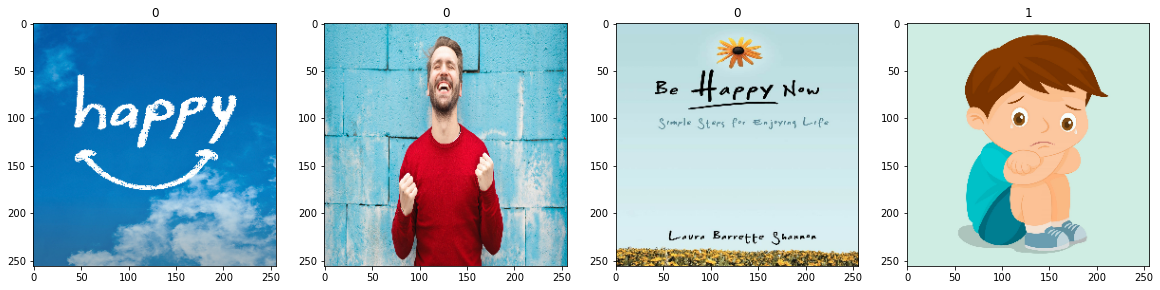

In [334]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

4.SCALE DATA

In [335]:
data = data.map(lambda x,y: (x/255, y))

In [336]:
scaled_iterator = data.as_numpy_iterator()

In [337]:
batch = scaled_iterator.next()

In [339]:
batch[0].max()

1.0

5.SPLIT DATA

In [340]:
len(data)

4

In [341]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size= int(len(data)*.2)+1

In [342]:
train_size,val_size,test_size

(2, 1, 1)

In [343]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

6.BUILD DEEP LEARNING MODEL

In [344]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [345]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [346]:
model = Sequential()

In [347]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [348]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [349]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 16)      

7.TRAIN

In [350]:
logdir='logs'

In [351]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [394]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 2s 1s/step - loss: 0.3350 - accuracy: 0.9219 - val_loss: 0.2551 - val_accuracy: 0.9375
Epoch 2/20
2/2 [==============================] - 2s 1s/step - loss: 0.3418 - accuracy: 0.8906 - val_loss: 0.2551 - val_accuracy: 0.9375
Epoch 3/20
2/2 [==============================] - 2s 1s/step - loss: 0.1924 - accuracy: 0.9844 - val_loss: 0.1952 - val_accuracy: 0.9688
Epoch 4/20
2/2 [==============================] - 2s 1s/step - loss: 0.1737 - accuracy: 0.9375 - val_loss: 0.1967 - val_accuracy: 0.9062
Epoch 5/20
2/2 [==============================] - 2s 1s/step - loss: 0.1537 - accuracy: 0.9531 - val_loss: 0.1847 - val_accuracy: 0.8750
Epoch 6/20
2/2 [==============================] - 2s 1s/step - loss: 0.1283 - accuracy: 0.9688 - val_loss: 0.1072 - val_accuracy: 0.9688
Epoch 7/20
2/2 [==============================] - 2s 1s/step - loss: 0.0983 - accuracy: 0.9688 - val_loss: 0.1944 - val_accuracy: 0.9062
Epoch 8/20
2/2 [=========================

8.PLOT PERFORMANCE

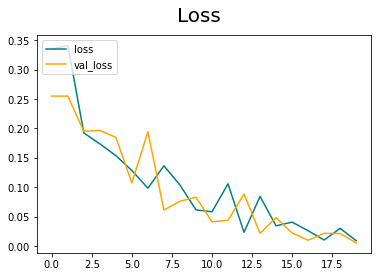

In [395]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

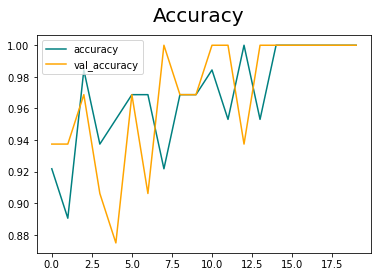

In [396]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

9.EVALUATE

In [397]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [398]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [399]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 47ms/step


In [400]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


10.TEST

In [401]:
import cv2

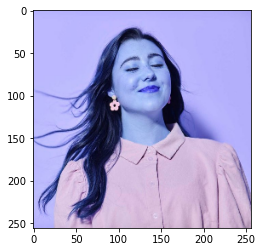

In [425]:
img = cv2.imread('happy-quotes-1640707884.jpg')
plt.imshow(img)
plt.imshow(resize.numpy().astype(int))
plt.show()

In [426]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 25ms/step


In [427]:
yhat

array([[0.26302674]], dtype=float32)

In [428]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


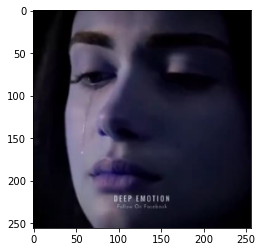

In [429]:
imgg = cv2.imread('cv-2a483aec_1622091522846_sc_new_compressed_thumb.jpeg')
plt.imshow(imgg)
resize = tf.image.resize(imgg, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [430]:
yhatt = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [431]:
yhatt

array([[0.9905002]], dtype=float32)

In [432]:
if yhatt > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


11.SAVE THE MODEL

In [433]:
from tensorflow.keras.models import load_model

In [435]:
model.save(os.path.join('OneDrive/Desktop/modelss','imageclassifier.h5'))

In [436]:
new_model = load_model(os.path.join('OneDrive/Desktop/modelss','imageclassifier.h5'))

In [437]:
new_model

In [438]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 72ms/step


array([[0.9905002]], dtype=float32)

In [439]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 23ms/step


In [440]:
if yhatnew > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
